# Evalaution Method 3: LLM Evaluation

## Method 1: Naive Yes/No Prompting

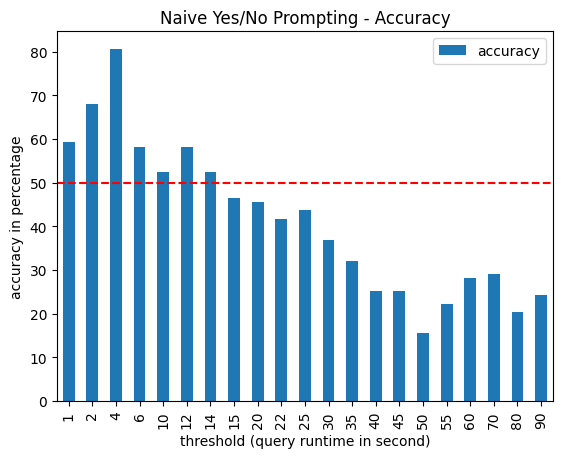

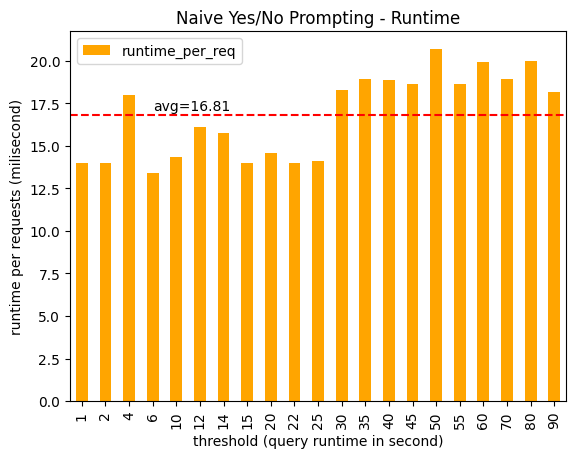

In [47]:
import pandas as pd
from io import StringIO

df = pd.read_csv(StringIO("""threshold,runtime,reqs,False,True
1,1.44,103,42,61
2,1.44,103,33,70
4,1.85,103,20,83
6,1.38,103,43,60
10,1.48,103,49,54
12,1.66,103,43,60
14,1.62,103,49,54
15,1.44,103,55,48
20,1.50,103,56,47
22,1.44,103,60,43
25,1.45,103,58,45
30,1.88,103,65,38
35,1.95,103,70,33
40,1.94,103,77,26
45,1.92,103,77,26
50,2.13,103,87,16
55,1.92,103,80,23
60,2.05,103,74,29
70,1.95,103,73,30
80,2.06,103,82,21
90,1.87,103,78,25"""))

df['accuracy'] = df['True'] / df['reqs'] * 100 # percentage

# Plot a bar chart where x-axis is the threshold and y-axis is accuracy.
# x-axis label should be threshold (query runtime in second)
# y-axis label should be accuracy in percentage
# title should be "LLM Evaluation"
# legend should be naive yes/no prompting
df.plot.bar(
    x='threshold', y='accuracy', title='Naive Yes/No Prompting - Accuracy',
    xlabel='threshold (query runtime in second)', ylabel='accuracy in percentage',
)
# Draw a horizontal line at 50% accuracy
import matplotlib.pyplot as plt
plt.axhline(y=50, color='r', linestyle='--')

# save figure to png
import matplotlib.pyplot as plt
plt.savefig('sec4_3-llm-01-naive-accuracy.png')

# Plot another chart about the query runtime
# x-axis is the threshold and y-axis is runtime
df['runtime_per_req'] = df['runtime'] / df['reqs'] * 1000
df.plot.bar(
    x='threshold', y='runtime_per_req', title='Naive Yes/No Prompting - Runtime',
    xlabel='threshold (query runtime in second)', 
    ylabel='runtime per requests (milisecond)',
    color='orange',
)

# Draw a line at average runtime, and add text to show the average runtime
plt.axhline(y=df['runtime_per_req'].mean(), color='r', linestyle='--')
plt.text(3, df['runtime_per_req'].mean() + 0.3, f'avg={df["runtime_per_req"].mean():.2f}', color='black')

plt.savefig('sec4_3-llm-01-naive-runtime.png')

## Method 2: Reason-then-confirm Prompt

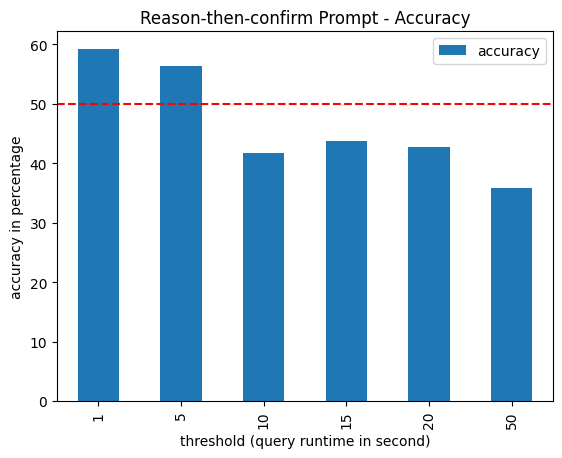

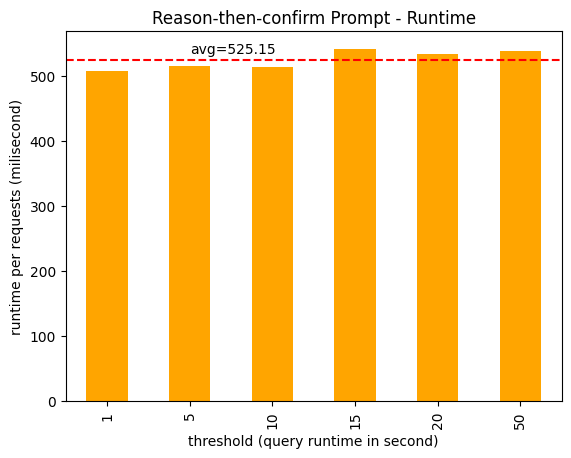

In [48]:
import pandas as pd
from io import StringIO

df = pd.read_csv(StringIO("""threshold,runtime,reqs,False,True
1,52.33,103,42,61
5,53.03,103,45,58
10,52.95,103,60,43
15,55.77,103,58,45
20,54.98,103,59,44
50,55.48,103,66,37"""))

df['accuracy'] = df['True'] / df['reqs'] * 100 # percentage

# Plot a bar chart where x-axis is the threshold and y-axis is accuracy.
# x-axis label should be threshold (query runtime in second)
# y-axis label should be accuracy in percentage
# title should be "LLM Evaluation"
df.plot.bar(
    x='threshold', y='accuracy', title='Reason-then-confirm Prompt - Accuracy',
    xlabel='threshold (query runtime in second)', ylabel='accuracy in percentage',
)
# Draw a horizontal line at 50% accuracy
import matplotlib.pyplot as plt
plt.axhline(y=50, color='r', linestyle='--')

# save figure to png
plt.savefig('sec4_3-llm-02-reason-accuracy.png')

# Plot another chart about the query runtime
# x-axis is the threshold and y-axis is runtime
df['runtime_per_req'] = df['runtime'] / df['reqs'] * 1000
df.plot.bar(
    x='threshold', y='runtime_per_req', title='Reason-then-confirm Prompt - Runtime',
    xlabel='threshold (query runtime in second)', 
    ylabel='runtime per requests (milisecond)',
    color='orange',
    legend=False
)

# Draw a line at average runtime, and add text to show the average runtime
plt.axhline(y=df['runtime_per_req'].mean(), color='r', linestyle='--')
plt.text(1, df['runtime_per_req'].mean() + 10, f'avg={df["runtime_per_req"].mean():.2f}', color='black')

plt.savefig('sec4_3-llm-02-reason-runtime.png')
